# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 5

### **Vectores Embebidos Pre-entrenados: Fasttext**

#### **Nombres y matrículas de los integrantes del equipo:**



*   Elemento de lista
*   Elemento de lista



In [1]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords

import re
import string


In [2]:
nltk.download('punkt')    # es un tokenizador que ayuda a dividr el texto en enunciados mediante un modelo no-supervisado.
nltk.download('stopwords')    # para tener acceso a "stopwords" en varios idiomas.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##**Pregunta - 1:**



In [3]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********
# Primero leer cada archivo en un DataFrame individual, por si las dudas
dfa = pd.read_csv('amazon5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')
dfi = pd.read_csv('imdb5.txt', delimiter='\t', names=['review','label'], header=None, encoding='utf-8')
dfy = pd.read_csv('yelp5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')
# Después, concatenar los DataFrames en uno solo
df = pd.concat([dfa, dfi, dfy])
# *********** Aquí termina la sección de agregar código *************


In [4]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  3000 non-null   object 
 1   label   2000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 70.3+ KB


In [5]:
# Y veamos sus primeros registros:

df.head()

,review,label
0,So there is no way for me to plug it in here i...,0.0
1,"Good case, Excellent value.",1.0
2,Great for the jawbone.,1.0
3,Tied to charger for conversations lasting more...,0.0
4,The mic is great.,1.0


##**Pregunta - 2:**

Realiza el proceso de limpieza.

Aplica el preprocesamiento que consideres adecuado, sin embargo, deberás aplicar necesariamente alguna de las técnicas de lematización.











In [6]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Descargar recursos de NLTK, si es necesario (ejecutar esto una sola vez)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Función para preprocesar el texto
def preprocess_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar caracteres no alfanuméricos ni espacios
    tokens = word_tokenize(text)  # Tokenizar con NLTK
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for token in tokens:
        if token not in stopwords.words('english') and not token.isdigit():  # Filtrar stopwords y números
            lemmas.append(lemmatizer.lemmatize(token))  # Obtener el lema
    return " ".join(lemmas)  # Unir los lemas en una cadena

# Aplicar preprocesamiento a la columna 'review'
Xclean = df['review'].astype(str).apply(preprocess_text)

# Almacenar la columna 'label' en Y
Y = df['label']

# Mostrar las primeras 5 filas de X_clean e Y
print("Xclean (primeras 5 filas):")
print(Xclean.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nY (primeras 5 filas):")
print(Y.head().to_markdown(index=False, numalign="left", stralign="left"))



# *********** Aquí termina la sección de agregar código *************

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Xclean (primeras 5 filas):
| review                                                 |
|:-------------------------------------------------------|
| way plug u unless go converter                         |
| good case excellent value                              |
| great jawbone                                          |
| tied charger conversation lasting minutesmajor problem |
| mic great                                              |

Y (primeras 5 filas):
| label   |
|:--------|
| 0       |
| 1       |
| 1       |
| 0       |
| 1       |


In [7]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:5]:
  print(x)


way plug u unless go converter
good case excellent value
great jawbone
tied charger conversation lasting minutesmajor problem
mic great


#**Pregunta - 3:**



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [8]:

# ************* Inicia la sección de agregar código:*****************************
from sklearn.model_selection import train_test_split


# Concatenar los DataFrames (asegúrate de tener dfa, dfi y dfy definidos)
df = pd.concat([dfa, dfi, dfy])

# División de datos directamente desde el DataFrame original df
x = df['review']
y = df['label']

# Primera división: 70% entrenamiento, 30% temporal
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# Segunda división: 50% del temporal para validación, 50% para prueba
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


#**Pregunta - 4:**



Construye tu vocabulario a continuación


In [10]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********
from collections import Counter

# Construir vocabulario
vocabulario = Counter()
for reseña in x_train:
    palabras = reseña.lower().split()  # Convertir a minúsculas y dividir en palabras
    for palabra in palabras:
        vocabulario[palabra] += 1

# Filtrar vocabulario
min_frecuencia = 2
min_longitud = 3
vocabulario = {palabra for palabra, frecuencia in vocabulario_freq.items() if frecuencia >= min_frecuencia and len(palabra) >= min_longitud}

# *********** Aquí termina la sección de agregar código *************

In [11]:
# b.	Indica el tamaño del vocabulario generado.



# ******* Inicia la sección de agregar código: ***********
tamaño_vocabulario = len(vocabulario)
print(f'Longitud del vocabulario generado:{tamaño_vocabulario}')


# *********** Aquí termina la sección de agregar código *************

Longitud del vocabulario generado:1761


c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?

Usar solo el conjunto de entrenamiento evita el sobreajuste al asegurar que el modelo no vea palabras de validación/prueba durante el entrenamiento, mejorando la generalización.

In [12]:
# d.	Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Función para filtrar palabras de una reseña
def filtrar_palabras(reseña, vocabulario):
    return " ".join(palabra for palabra in reseña.lower().split() if palabra in vocabulario)

# Aplicar filtro a los conjuntos de datos
train_x = x_train.apply(lambda x: filtrar_palabras(x, vocabulario))
val_x = x_val.apply(lambda x: filtrar_palabras(x, vocabulario))
test_x = x_test.apply(lambda x: filtrar_palabras(x, vocabulario))


# *********** Aquí termina la sección de agregar código *************


In [18]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

this your belt will make you feel like
keep the good work
don't have very many say about this place, but does everything pretty well.
disappointed with battery.
this film tries serious and flick and fails


#**Pregunta - 5:**


a. Incluye una tabla comparativa de pros y contras entre los modelos FastText, word2vec de Google y Glove de Stanford.

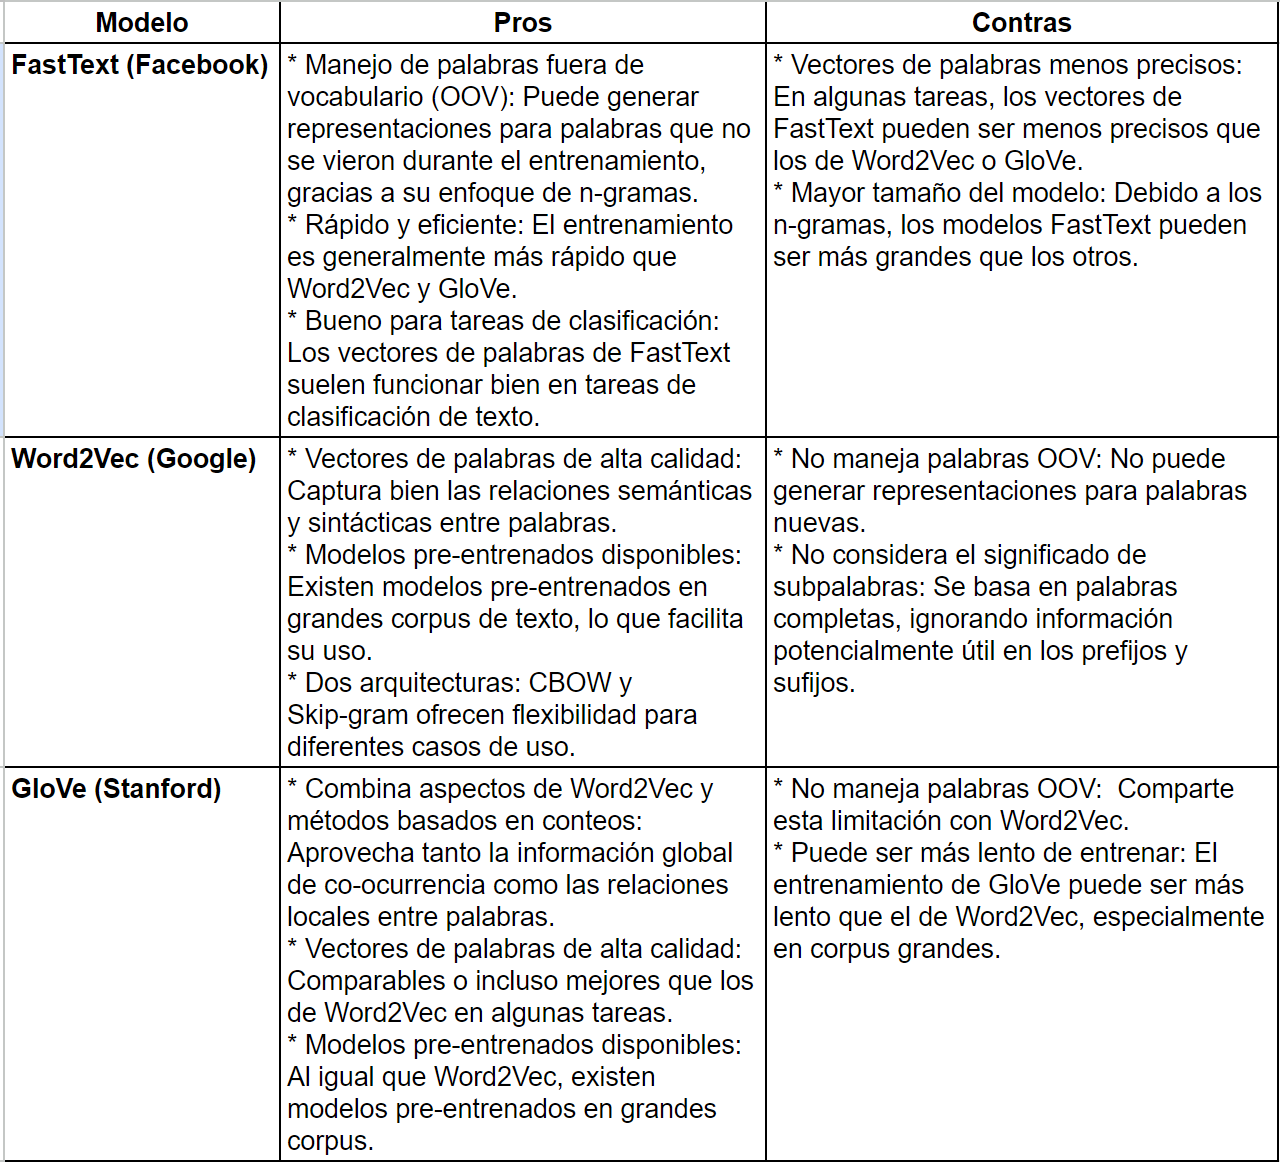

### ++++++++ Termina la sección de agregar texto: +++++++++++


#**Pregunta - 6:**

Utiliza el modelo FastText de vectores embebidos pre-entrenados de dimensión 300 para generar un nuevo diccionario clave-valor, donde la “clave” será cada token o palabra de tu vocabulario y el “valor” será su vector embebido de dimensión 300.

Este diccionario deberá ser del mismo tamaño que el vocabulario previo que hayas construido previamente.

Es recomendable que una vez que generes el nuevo vocabulario de vectores embebidos, guardes dicho diccionario en un archivo.

Recuerda borrar la variable donde descargaste los 2 millones de vectores embebidos Fasttext.



In [18]:
>>> import fasttext.util
>>> fasttext.util.download_model('en', if_exists='ignore')  # English
>>> ft = fasttext.load_model('cc.en.300.bin')

In [19]:
# Construir vocabulario
vocabulario_freq = Counter()
for reseña in x_train:
    palabras = reseña.lower().split()
    for palabra in palabras:
        vocabulario_freq[palabra] += 1

min_frecuencia = 2
min_longitud = 3
vocabulario = {palabra for palabra, frecuencia in vocabulario_freq.items() if frecuencia >= min_frecuencia and len(palabra) >= min_longitud}

# Verificar el tamaño del vocabulario generado
tamaño_vocabulario = len(vocabulario)
print(f'El tamaño del vocabulario es: {tamaño_vocabulario}')

# Crear el diccionario de embeddings
vocabulario_embeddings = {}

# Iterar sobre el vocabulario y obtener los embeddings
for palabra in vocabulario:
    vocabulario_embeddings[palabra] = ft.get_word_vector(palabra)

# Guardar el diccionario en un archivo npz
np.savez_compressed('vocabulario_embeddings.npz', **vocabulario_embeddings)

# Eliminar el modelo FastText para liberar memoria
del ft

# Verificar y mostrar resultados
print(f"Diccionario de embeddings creado y guardado en 'vocabulario_embeddings.npz'")
print(f"Tamaño del diccionario: {len(vocabulario_embeddings)}")

El tamaño del vocabulario es: 1761
Diccionario de embeddings creado y guardado en 'vocabulario_embeddings.npz'
Tamaño del diccionario: 1761


#**Pregunta - 7:**



Generamos los vectores embebidos a paertir de los conjuntos de entrenamiento, validación y preuba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

In [25]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

import numpy as np

# Cargar el diccionario de embeddings generado previamente
vocabulario_embeddings = np.load('vocabulario_embeddings.npz')

# Función para obtener el embedding promedio de una reseña
def obtener_embedding_promedio(reseña, vocabulario_embeddings):
    embeddings = []
    for palabra in reseña.split():
        if palabra in vocabulario_embeddings:
            embeddings.append(vocabulario_embeddings[palabra])
    if embeddings:  # Verificar si hay embeddings válidos
        return np.mean(embeddings, axis=0)  # Calcular el promedio
    else:
        return np.zeros(300)  # Retornar un vector de ceros si no hay embeddings

# Aplicar la función a cada conjunto de datos
trainEmb = train_x.apply(lambda x: obtener_embedding_promedio(x, vocabulario_embeddings))
valEmb = val_x.apply(lambda x: obtener_embedding_promedio(x, vocabulario_embeddings))
testEmb = test_x.apply(lambda x: obtener_embedding_promedio(x, vocabulario_embeddings))

# Convertir a arrays de NumPy para su uso en modelos de aprendizaje automático
trainEmb = np.array(list(trainEmb))
valEmb = np.array(list(valEmb))
testEmb = np.array(list(testEmb))



# *********** Aquí termina la sección de agregar código *************

In [21]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

Train-Emb: (2100, 300)
Val-Emb: (450, 300)
Test-Emb: (450, 300)


#**Pregunta - 8:**



Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

In [29]:
# REGRESIÓN LOGÍSTICA:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********
#Primero cargamos librerías
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
# Imputar valores NaN con la moda en y_val (usando el mismo imputador)
y_val = imputer.transform(y_val.values.reshape(-1, 1)).ravel()

# Entrenar el modelo de Regresión Logística
modelo_rl = LogisticRegression(max_iter=1000, random_state=42)
modelo_rl.fit(trainEmb, y_train)

# Predicciones en el conjunto de validación (Regresión Logística)
y_pred_rl = modelo_rl.predict(valEmb)

print("\nRegresión Logística:")
print(f"Exactitud: {accuracy_score(y_val, y_pred_rl):.4f}")
print("Reporte de Clasificación:\n", classification_report(y_val, y_pred_rl))

# *********** Aquí termina la sección de agregar código *************



Regresión Logística:
Exactitud: 0.7267
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.75      0.37      0.50       164
         1.0       0.72      0.93      0.81       286

    accuracy                           0.73       450
   macro avg       0.74      0.65      0.66       450
weighted avg       0.73      0.73      0.70       450



In [30]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Entrenar el modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Se pueden ajustar los n_estimators
modelo_rf.fit(trainEmb, y_train)

# Predicciones en el conjunto de validación (Random Forest)
y_pred_rf = modelo_rf.predict(valEmb)

print("\nRandom Forest:")
print(f"Exactitud: {accuracy_score(y_val, y_pred_rf):.4f}")
print("Reporte de Clasificación:\n", classification_report(y_val, y_pred_rf))



# *********** Aquí termina la sección de agregar código *************


Random Forest:
Exactitud: 0.7333
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.76      0.40      0.52       164
         1.0       0.73      0.93      0.82       286

    accuracy                           0.73       450
   macro avg       0.74      0.66      0.67       450
weighted avg       0.74      0.73      0.71       450



#**Pregunta - 9:**



Reporte del mejor modelo.


In [31]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

from sklearn.metrics import confusion_matrix, classification_report

# Predicciones en el conjunto de prueba (trainEmb en este caso)
y_pred_train = modelo_rf.predict(trainEmb)

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_train, y_pred_train))

# Reporte de clasificación
print("\nReporte de Clasificación en el conjunto de prueba (trainEmb):")
print(classification_report(y_train, y_pred_train))



# *********** Aquí termina la sección de agregar código *************


Matriz de Confusión:
[[ 682    4]
 [   5 1409]]

Reporte de Clasificación en el conjunto de prueba (trainEmb):
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       686
         1.0       1.00      1.00      1.00      1414

    accuracy                           1.00      2100
   macro avg       0.99      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100



#**Pregunta - 10:**

Consideramos que la primera parte de esta actividad (de las preguntas 1 a la 4) nos sirvió para reforzar lo que vimos en el módulo 1. Además, las lecturas que tuvimos que hacer para la pregunta 5 nos sirvieron para conocer los pros y contras de distintos modelos de word embedding; finalmente, nos pareció una buena experiencia de aprendizaje práctico utilizar FastText. Consideramos que sería interesante también emplear otros modelos de word embedding en un futuro. Sin lugar a dudas, fue una tarea desafiante pero satsifactoria.

##**Fin de la Actividad de vectores Embebidos - FastText**